Acknowledgements

Ahmed H, Traore I, Saad S. “Detecting opinion spams and fake news using text classification”, Journal of Security and Privacy, Volume 1, Issue 1, Wiley, January/February 2018.

Ahmed H, Traore I, Saad S. (2017) “Detection of Online Fake News Using N-Gram Analysis and Machine Learning Techniques. In: Traore I., Woungang I., Awad A. (eds) Intelligent, Secure, and Dependable Systems in Distributed and Cloud Environments. ISDDC 2017. Lecture Notes in Computer Science, vol 10618. Springer, Cham (pp. 127-138).

In [ ]:
import csv
#  Parses through data
RealData = []
RealLabels = []
with open("Real.csv") as csvfile:
  reader = csv.reader(csvfile, delimiter= ",")
  next(reader)  # Removes title row
  for row in reader:
    RealData.append(row[0])  # Appends the title of the article
    RealLabels.append([0, 1])  # Appends a sequence that represents the Real label
FakeData = []
FakeLabels = []
with open("Fake.csv") as csvfile:
  reader = csv.reader(csvfile, delimiter = ",")
  next(reader)  # Removes title row
  for row in reader:
    FakeData.append(row[0])  # Appends the title of the article
    FakeLabels.append([1, 0])  # Appends a sequence that represents the Fake label
print(len(RealData))
print(len(FakeData))
print(RealData[0])
print(FakeData[0])


21417
23481
As U.S. budget fight looms, Republicans flip their fiscal script
 Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing


In [ ]:
# Makes a 70:30 train-validation data split
split = 0.7  
RealDataTrain = RealData[:round(len(RealData)*split)]
RealDataTrainLabels = RealLabels[:round(len(RealLabels)*split)]
RealDataVal = RealData[round(len(RealData)*split):]
RealDataValLabels = RealLabels[round(len(RealLabels)*split):]

FakeDataTrain = FakeData[:round(len(FakeData)*split)]
FakeDataTrainLabels = FakeLabels[:round(len(FakeLabels)*split)]
FakeDataVal = FakeData[round(len(FakeData)*split):]
FakeDataValLabels = FakeLabels[round(len(FakeLabels)*split):]


In [ ]:
# Combines the Real and Fake data into the training dataset/label and validation dataset/label
TrainData = []
TrainData = RealDataTrain + FakeDataTrain
TrainLabels = RealDataTrainLabels + FakeDataTrainLabels
ValData = []
ValLabels = RealDataValLabels + FakeDataValLabels
ValData = RealDataVal + FakeDataVal


In [ ]:
# Specifies parameters needed for Natural Language Processing
vocab_size = 1000
embedding_dim = 16
max_length = 30
trunc_type='post'
oov_tok='<OOV>'

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Takes the string data and serializes it into a format able to be given to the model
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(TrainData)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(TrainData)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(ValData)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, truncating=trunc_type)


In [ ]:
# Shows a random sample of a training data value and label
import random as rnd
randIndex = rnd.randrange(0, len(TrainData))
print(randIndex)
print(TrainData[randIndex])
TrainLabels[randIndex]
if TrainLabels[randIndex][0] == 0:
  print("Real")
else:
  print("Fake")
  

1619
U.S. Commerce chief says expanded North Korean sanctions show China's waning support: CNBC
Real


In [ ]:
# The model uses Embedding and LSTM layers, followed by Dense layers
import tensorflow as tf

model = tf.keras.Sequential([tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
                             tf.keras.layers.Dense(512, activation = 'relu'),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(2, activation = 'softmax')])

model.compile(loss ="categorical_crossentropy", optimizer='adam', metrics=['acc'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 16)            16000     
_________________________________________________________________
bidirectional (Bidirectional (None, 30, 64)            12544     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 512)               66048     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 258       
Total params: 226,562
Trainable params: 226,562
Non-trainable params: 0
__________________________________________________

In [ ]:
# The model is trained
import numpy as np
history = model.fit(padded, np.array(TrainLabels), epochs=10, validation_data=(testing_padded, np.array(ValLabels)))


Epoch 1/10
983/983 [==============================] - 14s 15ms/step - loss: 0.1575 - acc: 0.9374 - val_loss: 0.1826 - val_acc: 0.9308
Epoch 2/10
983/983 [==============================] - 13s 13ms/step - loss: 0.1032 - acc: 0.9619 - val_loss: 0.1654 - val_acc: 0.9348
Epoch 3/10
983/983 [==============================] - 13s 13ms/step - loss: 0.0886 - acc: 0.9672 - val_loss: 0.1610 - val_acc: 0.9357
Epoch 4/10
983/983 [==============================] - 13s 13ms/step - loss: 0.0821 - acc: 0.9694 - val_loss: 0.1819 - val_acc: 0.9376
Epoch 5/10
983/983 [==============================] - 13s 13ms/step - loss: 0.0735 - acc: 0.9738 - val_loss: 0.1774 - val_acc: 0.9395
Epoch 6/10
983/983 [==============================] - 13s 13ms/step - loss: 0.0675 - acc: 0.9749 - val_loss: 0.1665 - val_acc: 0.9376
Epoch 7/10
983/983 [==============================] - 13s 13ms/step - loss: 0.0624 - acc: 0.9768 - val_loss: 0.1812 - val_acc: 0.9390
Epoch 8/10
983/983 [==============================] - 13s 13ms

In [ ]:
# Tests our model on a random piece of validation data
import random as rnd
randIndex = rnd.randrange(0, len(ValData))
testStringSequence = tokenizer.texts_to_sequences([ValData[randIndex]])
paddedSequence = pad_sequences(testStringSequence, maxlen=max_length, truncating=trunc_type)
print(ValData[randIndex])
probabilities = model.predict(paddedSequence)[0]
print(probabilities)
if probabilities[0] > probabilities[1]:
  print("Fake")
else:
  print("Real")


Why Did CNN Doctor Killer’s Photo To Disguise His Race And Why Is The Press Scrubbing His Profile?
[9.9951494e-01 4.8503096e-04]
Fake


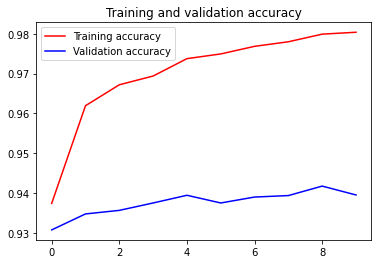

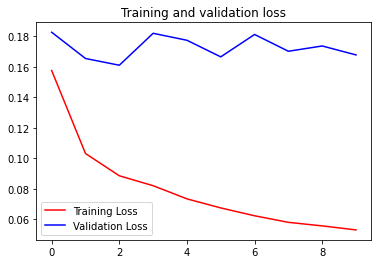

In [ ]:
# Graphs the change in accuracy, loss, validation accuracy, and validation loss
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [ ]:
# Exports the model into an h5 file
model.save('Articles.h5') 


In [ ]:
import pickle as pkl
fileDump = open("articlesTokenizer.pkl", "wb")
pkl.dump(tokenizer, fileDump)